**Denoising by AEs**

In [7]:
###Add python library here####
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
%matplotlib inline
figsize=(15, 6)
plt.style.use('fivethirtyeight')

**Loading dataset**

In [13]:
# Fashion-MNIST data loader

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])
train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=img_transform,
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=img_transform)

batch_size = 256
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

**Undercomplete**

Autoencoder architecture

In [18]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 200), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(200, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x       

Evaluation

In [20]:
learning_rate=0.1
model = autoencoder()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        output = model.forward(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if (epoch+1) % 10 == 0:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Test Loss : {}'.format(test_loss))
    if (epoch+1) == num_epochs:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Finall model test loss : {}'.format(test_loss))

epoch [1/42], loss:0.2383
epoch [2/42], loss:0.1779
epoch [3/42], loss:0.1601
epoch [4/42], loss:0.1564
epoch [5/42], loss:0.1492
epoch [6/42], loss:0.1350
epoch [7/42], loss:0.1257
epoch [8/42], loss:0.1321
epoch [9/42], loss:0.1293
epoch [10/42], loss:0.1202
Test Loss : 0.11545739322900772
epoch [11/42], loss:0.1134
epoch [12/42], loss:0.1048
epoch [13/42], loss:0.1034
epoch [14/42], loss:0.1054
epoch [15/42], loss:0.0968
epoch [16/42], loss:0.0925
epoch [17/42], loss:0.0952
epoch [18/42], loss:0.0982
epoch [19/42], loss:0.0964
epoch [20/42], loss:0.0843
Test Loss : 0.09409471601247787
epoch [21/42], loss:0.0910
epoch [22/42], loss:0.0905
epoch [23/42], loss:0.0856
epoch [24/42], loss:0.0941
epoch [25/42], loss:0.0824
epoch [26/42], loss:0.0827
epoch [27/42], loss:0.0845
epoch [28/42], loss:0.0843
epoch [29/42], loss:0.0807
epoch [30/42], loss:0.0719
Test Loss : 0.08341971784830093
epoch [31/42], loss:0.0849
epoch [32/42], loss:0.0764
epoch [33/42], loss:0.0770
epoch [34/42], loss:0.

**Overcomplete**

Autoencoder architecture

In [21]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1200), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(1200, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x    

Evaluation

In [22]:
learning_rate=0.1
model = autoencoder()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        output = model.forward(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if (epoch+1) % 10 == 0:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Test Loss : {}'.format(test_loss))
    if (epoch+1) == num_epochs:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Finall model test loss : {}'.format(test_loss))

epoch [1/42], loss:0.1490
epoch [2/42], loss:0.1255
epoch [3/42], loss:0.1155
epoch [4/42], loss:0.1042
epoch [5/42], loss:0.1068
epoch [6/42], loss:0.0885
epoch [7/42], loss:0.0929
epoch [8/42], loss:0.0780
epoch [9/42], loss:0.0844
epoch [10/42], loss:0.0764
Test Loss : 0.08018103241920471
epoch [11/42], loss:0.0724
epoch [12/42], loss:0.0744
epoch [13/42], loss:0.0696
epoch [14/42], loss:0.0689
epoch [15/42], loss:0.0684
epoch [16/42], loss:0.0719
epoch [17/42], loss:0.0658
epoch [18/42], loss:0.0651
epoch [19/42], loss:0.0680
epoch [20/42], loss:0.0591
Test Loss : 0.06349001824855804
epoch [21/42], loss:0.0554
epoch [22/42], loss:0.0610
epoch [23/42], loss:0.0590
epoch [24/42], loss:0.0571
epoch [25/42], loss:0.0548
epoch [26/42], loss:0.0549
epoch [27/42], loss:0.0598
epoch [28/42], loss:0.0548
epoch [29/42], loss:0.0532
epoch [30/42], loss:0.0474
Test Loss : 0.05410249903798103
epoch [31/42], loss:0.0501
epoch [32/42], loss:0.0527
epoch [33/42], loss:0.0561
epoch [34/42], loss:0.

**2. Undercomplete Vs Overcomplete**

Well, in undercomplete networks, the dimention of the hidden layer is smaller than input layer. So this network should use important features of the data and if we set the hidden layer size too small we may face big error but it has two profites. First of all, because our network is smaller than overcomplete so we should pay less computational costs. In undercomplete networks we usually face less overfitting and risk of memorizing data instead of learning it. As a proof of this, for the undercomplete model test loss is usually smaller than train loss. But for the overcomplete network we can see that test loss is usually larger than train loss. 

On the other hand overcomplete networks have lots of parameters and are more powerful models and in the results we can see less loss in this network comparing to the undercomplete network.

So if you have a rich dataset and you have chosen the train part of it in a good manner and a completely distrubuited way so that we can guarantee that our overcomplete network has seen most of the input space, then we have minimized the chance of overfitting and  overcomplete networks may be good choices and they have usually less loss

**L1 regularization** $(\lambda = 0.1)$

Autoencoder architecture

In [23]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1200), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(1200, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x    

Evaluation

In [25]:
learning_rate=0.1
Lambda = 0.1
model = autoencoder()

criterion1 = nn.MSELoss()
criterion2 = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        output = model.forward(noisy_images)
        shape = model.encoder(noisy_images)
        loss = criterion(output, images) + Lambda * criterion2(shape, torch.zeros(shape.shape))
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if (epoch+1) % 10 == 0:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion1(output, images)
        test_loss = test_loss / len(test_loader)
        print('Test Loss : {}'.format(test_loss))
    if (epoch+1) == num_epochs:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion1(output, images)
        test_loss = test_loss / len(test_loader)
        print('Finall model test loss : {}'.format(test_loss))

epoch [1/42], loss:0.2014
epoch [2/42], loss:0.1779
epoch [3/42], loss:0.1636
epoch [4/42], loss:0.1434
epoch [5/42], loss:0.1310
epoch [6/42], loss:0.1288
epoch [7/42], loss:0.1224
epoch [8/42], loss:0.1164
epoch [9/42], loss:0.1138
epoch [10/42], loss:0.1136
Test Loss : 0.07887706160545349
epoch [11/42], loss:0.1146
epoch [12/42], loss:0.1092
epoch [13/42], loss:0.1030
epoch [14/42], loss:0.1016
epoch [15/42], loss:0.0955
epoch [16/42], loss:0.0959
epoch [17/42], loss:0.0942
epoch [18/42], loss:0.0909
epoch [19/42], loss:0.0965
epoch [20/42], loss:0.0861
Test Loss : 0.06191210821270943
epoch [21/42], loss:0.0959
epoch [22/42], loss:0.0934
epoch [23/42], loss:0.0910
epoch [24/42], loss:0.0861
epoch [25/42], loss:0.0795
epoch [26/42], loss:0.0817
epoch [27/42], loss:0.0895
epoch [28/42], loss:0.0797
epoch [29/42], loss:0.0802
epoch [30/42], loss:0.0784
Test Loss : 0.05270365998148918
epoch [31/42], loss:0.0824
epoch [32/42], loss:0.0784
epoch [33/42], loss:0.0804
epoch [34/42], loss:0.

**L2 regularization** $(\lambda = 0.1)$

Autoencoder architecture

In [26]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1200), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(1200, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x    

Evaluation

In [28]:
learning_rate=0.1
Lambda = 0.1
model = autoencoder()

criterion1 = nn.MSELoss()
criterion2 = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        output = model.forward(noisy_images)
        shape = model.encoder(noisy_images)
        loss = criterion(output, images) + Lambda * criterion2(shape, torch.zeros(shape.shape))
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if (epoch+1) % 10 == 0:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion1(output, images)
        test_loss = test_loss / len(test_loader)
        print('Test Loss : {}'.format(test_loss))
    if (epoch+1) == num_epochs:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion1(output, images)
        test_loss = test_loss / len(test_loader)
        print('Finall model test loss : {}'.format(test_loss))

epoch [1/42], loss:0.1919
epoch [2/42], loss:0.1616
epoch [3/42], loss:0.1468
epoch [4/42], loss:0.1263
epoch [5/42], loss:0.1257
epoch [6/42], loss:0.1149
epoch [7/42], loss:0.1052
epoch [8/42], loss:0.0979
epoch [9/42], loss:0.0988
epoch [10/42], loss:0.0967
Test Loss : 0.0787639170885086
epoch [11/42], loss:0.0936
epoch [12/42], loss:0.0953
epoch [13/42], loss:0.0879
epoch [14/42], loss:0.0858
epoch [15/42], loss:0.0840
epoch [16/42], loss:0.0811
epoch [17/42], loss:0.0835
epoch [18/42], loss:0.0830
epoch [19/42], loss:0.0785
epoch [20/42], loss:0.0796
Test Loss : 0.06167052313685417
epoch [21/42], loss:0.0768
epoch [22/42], loss:0.0706
epoch [23/42], loss:0.0726
epoch [24/42], loss:0.0696
epoch [25/42], loss:0.0662
epoch [26/42], loss:0.0653
epoch [27/42], loss:0.0688
epoch [28/42], loss:0.0696
epoch [29/42], loss:0.0649
epoch [30/42], loss:0.0647
Test Loss : 0.052354954183101654
epoch [31/42], loss:0.0593
epoch [32/42], loss:0.0664
epoch [33/42], loss:0.0658
epoch [34/42], loss:0.

**Dropout regularization** $(dp = 0.4)$

Autoencoder architecture

In [29]:
class autoencoder(nn.Module):
    def __init__(self, dp):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1200), nn.Tanh())
        self.decoder = nn.Sequential(nn.Dropout(p=dp), nn.Linear(1200, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x    

Evaluation

In [30]:
learning_rate=0.1
dp = 0.4
model = autoencoder(dp)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        output = model.forward(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if (epoch+1) % 10 == 0:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Test Loss : {}'.format(test_loss))
    if (epoch+1) == num_epochs:
        test_loss = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            test_loss += criterion(output, images)
        test_loss = test_loss / len(test_loader)
        print('Finall model test loss : {}'.format(test_loss))

epoch [1/42], loss:0.1913
epoch [2/42], loss:0.1615
epoch [3/42], loss:0.1366
epoch [4/42], loss:0.1134
epoch [5/42], loss:0.1208
epoch [6/42], loss:0.1057
epoch [7/42], loss:0.1007
epoch [8/42], loss:0.0979
epoch [9/42], loss:0.1058
epoch [10/42], loss:0.0952
Test Loss : 0.09390175342559814
epoch [11/42], loss:0.0890
epoch [12/42], loss:0.0898
epoch [13/42], loss:0.0839
epoch [14/42], loss:0.0907
epoch [15/42], loss:0.0812
epoch [16/42], loss:0.0796
epoch [17/42], loss:0.0768
epoch [18/42], loss:0.0708
epoch [19/42], loss:0.0794
epoch [20/42], loss:0.0726
Test Loss : 0.07497431337833405
epoch [21/42], loss:0.0772
epoch [22/42], loss:0.0686
epoch [23/42], loss:0.0703
epoch [24/42], loss:0.0643
epoch [25/42], loss:0.0715
epoch [26/42], loss:0.0698
epoch [27/42], loss:0.0681
epoch [28/42], loss:0.0682
epoch [29/42], loss:0.0604
epoch [30/42], loss:0.0656
Test Loss : 0.06477691233158112
epoch [31/42], loss:0.0720
epoch [32/42], loss:0.0585
epoch [33/42], loss:0.0602
epoch [34/42], loss:0.

**3. Regularization methods comparison**

Well we use regularization to improve network learning and prevent overfitting and instead helping network to learn more important information and prevent working just speciall part of the network or group of neurons and instead helping to see a layer as a integrated unit and distrubuited activation in hidden layer.

So we used exactly the same network as the overcomplete network of the previous part ans we can see improvment in test loss and now by regularization test loss are less than train loss so we do not have overfitting problem of the overcomplete network.

Finally it seems that L1 and L2 regularizations have better resaults than dropout method.

**Now compare the noisy and denoised version of the Fasiohn MNIST(visually)**

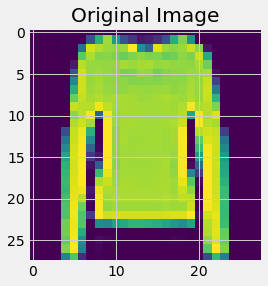

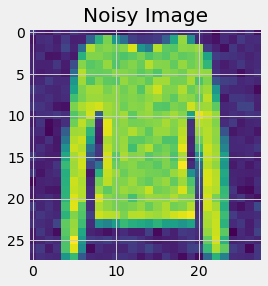

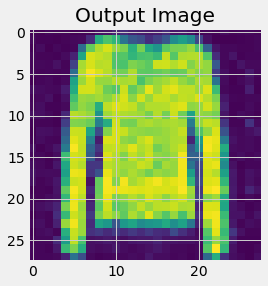

In [47]:
images = train_dataset.data / 128 - 1
perm = torch.randperm(len(images))

original_img = images[perm][0].view(-1, 28 * 28).requires_grad_()
noisy_img = original_img + 0.1 * torch.randn(original_img.shape)
output_img = model.forward(noisy_img)

original_img = original_img.reshape(28, 28)
noisy_img = noisy_img.reshape(28, 28)
output_img = output_img.reshape(28, 28)

plt.imshow(original_img.detach())
plt.title('Original Image')
plt.show()

plt.imshow(noisy_img.detach())
plt.title('Noisy Image')
plt.show()

plt.imshow(output_img.detach())
plt.title('Output Image')
plt.show()